In [2]:
from utils_func import *

In [3]:

method = 'vanilla'
mxu_shape = None
pg_gran = None
batch_size = 1
low_rank_ratio = 0.1
m_ratio = 4
spattn_density = 0.1
seq_len = 512
model = 'XLM'
unit = Unit()
data_path = os.path.join(module_path,"data")
model_path = os.path.join(data_path,"model")
create_model(seq_len, name=model, data_path=data_path, density=(1,1,1), low_rank_ratio=low_rank_ratio,
             m_ratio=m_ratio, spattn_density=spattn_density, method=method)
model = model + f'_{method}'

,Op Type,Dimension,Bound,C/M ratio,Op Intensity,Latency (msec),Cycles,C Effcy,Input_a (MB),Input_w (MB),Output (MB),Total Data (MB),Throughput (Tflops),Roofline Throughput offchip (Tflops),Roofline Throughput onchip (Tflops)
0,GEMM,"[1, 2048, 512, 2048]",C,2.49,341.33,0.03,32768.00,1.00,1.05,4.19,1.05,6.29,123.21,123.21,123.21
1,GEMM,"[1, 2048, 512, 2048]",C,2.49,341.33,0.03,32768.00,1.00,1.05,4.19,1.05,6.29,123.21,123.21,123.21
2,GEMM,"[1, 2048, 512, 2048]",C,2.49,341.33,0.03,32768.00,1.00,1.05,4.19,1.05,6.29,123.21,123.21,123.21
3,Logit,"[1, 16, 512, 512, 128]",M,0.62,85.33,0.01,13142.15,1.00,1.05,1.05,4.19,6.29,76.80,76.80,123.21
4,Attend,"[1, 16, 512, 512, 128]",M,0.62,85.33,0.01,13142.15,1.00,4.19,1.05,1.05,6.29,76.80,76.80,123.21
5,GEMM,"[1, 2048, 512, 2048]",C,2.49,341.33,0.03,32768.00,1.00,1.05,4.19,1.05,6.29,123.21,123.21,123.21
6,GEMM,"[1, 8192, 512, 2048]",C,2.85,390.10,0.14,131072.00,1.00,1.05,16.78,4.19,22.02,123.21,123.21,123.21
7,GEMM,"[1, 2048, 512, 8192]",C,2.85,390.10,0.14,131072.00,1.00,4.19,16.78,1.05,22.02,123.21,123.21,123.21


,Latency (msec),Cycles,Parameters (MB),On-chip Memory Footprint (MB)
0,0.45,419500.31,50.33,22.02


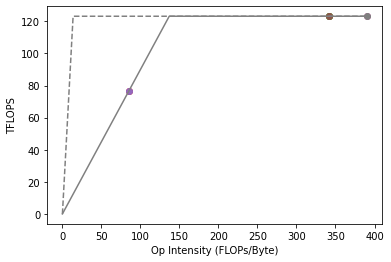

In [4]:
unit = Unit()
system = System(unit, mxu_shape = mxu_shape, compress_mem=False, skip_compute=False, pg_gran=pg_gran)
model_df = get_model_df(model, system, unit, batch_size, data_path)
display(model_df)

dot_roofline(model_df, system, unit)
get_summary_table(model_df)
